   Permit No.  Division Event Date            Address            From  \
0  DPW1400991       1.0  3/15/2014    862 PROGRESS ST   CARPENTER WAY   
1  DPW1301434       1.0  3/16/2013    862 PROGRESS ST   CARPENTER WAY   
2  DPW1400964       2.0  3/17/2014  112 N PACIFIC AVE        PENN AVE   
3  DPW1308521       2.0  3/29/2014      7219 KELLY ST    HOMEWOOD AVE   
4  DPW1301929       3.0  3/31/2013   4919 GERTRUDE ST  FLOWERS AVENUE   
5  DPW1401522       1.0   4/5/2014   2334 MANNHEIM ST          ATMORE   
6  DPW1302018       2.0   4/6/2013       0 DAVISON ST     STANTON AVE   
7  DPW1401712       3.0  4/12/2014  5110 CHAPLAIN WAY  W ELIZABETH ST   
8  DPW1401252       3.0  4/12/2014   5615 WILKINS AVE     WIGHTMAN ST   
9  DPW1302006       2.0  4/19/2013    5330 KINCAID ST         N AIKEN   

             To  
0   PROGRESS ST  
1   PROGRESS ST  
2   DEARBORN ST  
3   STERRETT ST  
4   GLEN CALADH  
5       MC COOK  
6       52ND ST  
7  COURTLAND ST  
8  S NEGLEY AVE  
9    N ATLANTIC 

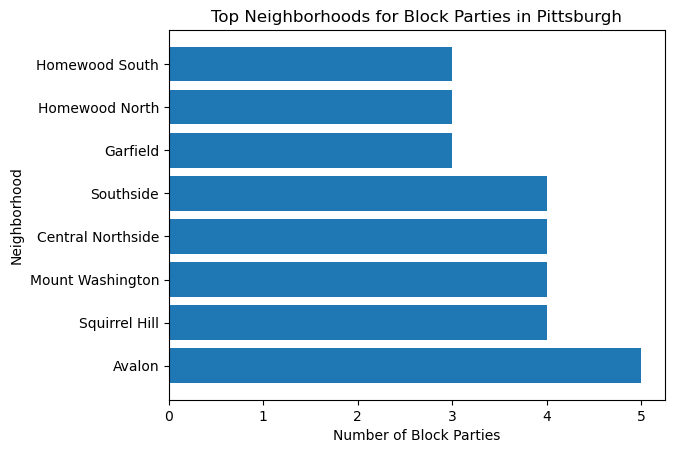

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#loading the dataset
block_party_data = pd.read_csv('block-party.csv') 

#showing the first 10 rows of the data 
print(block_party_data.head(10))

#creating an empty dictionary to count block parties by address
address_counts = {}

#looping through each address in the dataset
for address in block_party_data['Address']:
    if address in address_counts:
        address_counts[address] += 1  #increment the count if address is already in dictionary
    else:
        address_counts[address] = 1  #initialize the count to 1 if address is new

#find the top 10 addresses
top_addresses = []  #list for top 10 addresses
top_counts = []     #list for the counts of the top 10 addresses

for i in range(10):  #loop runs 10 times
    max_count = 0 #initialize max_count to 0
    max_address = None #intialize max_address to none
    
    #find the address with the highest count that hasn't been added yet
    for address, count in address_counts.items():
        #if the count is higher than the max count and the address is not in the list already
        if count > max_count and address not in top_addresses:
            max_count = count
            max_address = address
    
    #adding the top addresses and its count to the lists
    top_addresses.append(max_address)
    top_counts.append(max_count)

#converting the top 10 addresses to the corresponding neighborhoods
top_neighborhoods = []
for address in top_addresses:
    if address == "1 CALIFORNIA AVE":
        top_neighborhoods.append("Avalon")
    elif address == "0 MONTEREY ST":
        top_neighborhoods.append("Central Northside")
    elif address == "7120 KELLY ST":
        top_neighborhoods.append("Homewood South")
    elif address == "7151 MOUNT VERNON ST":
        top_neighborhoods.append("Homewood North")
    elif address == "5330 KINCAID ST":
        top_neighborhoods.append("Garfield")
    elif address == "0 CAREY WAY":
        top_neighborhoods.append("Southside")
    elif address == "1240 RESACA PL":
        top_neighborhoods.append("Central Northside")
    elif address == "508 GRACE ST":
        top_neighborhoods.append("Mount Washington")
    elif address == "5510 DARLINGTON RD":
        top_neighborhoods.append("Squirrel Hill")
    elif address == "1214 BENNINGTON AVE":
        top_neighborhoods.append("Squirrel Hill")
    else:
        top_neighborhoods.append("Unknown")  #default case

#plotting neighborhoods
plt.barh(top_neighborhoods, top_counts)
plt.xlabel('Number of Block Parties')
plt.ylabel('Neighborhood')
plt.title('Top Neighborhoods for Block Parties in Pittsburgh')
plt.show()
